In [32]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("gender_baseline.csv")

In [34]:
train.head()


,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
test.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
print ("Training test shape:", train.shape)
print ("Test set shape:", test.shape)

Training test shape: (891, 12)
Test set shape: (418, 11)


In [37]:
ss.head()


,passenger_id,survived
0,295,0
1,1150,0
2,89,0
3,1063,0
4,1020,0


In [38]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  ----- 

In [39]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

cabin           687
age             177
embarked          2
passenger_id      0
survived          0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
fare              0
dtype: int64

In [40]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

cabin           687
age             177
embarked          2
passenger_id      0
survived          0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
fare              0
dtype: int64

In [41]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

cabin           327
age              86
fare              1
passenger_id      0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
embarked          0
dtype: int64

In [42]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  ----- 

In [43]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

cabin           687
age             177
embarked          2
passenger_id      0
survived          0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
fare              0
dtype: int64

In [44]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

cabin           327
age              86
fare              1
passenger_id      0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
embarked          0
dtype: int64

<AxesSubplot:>

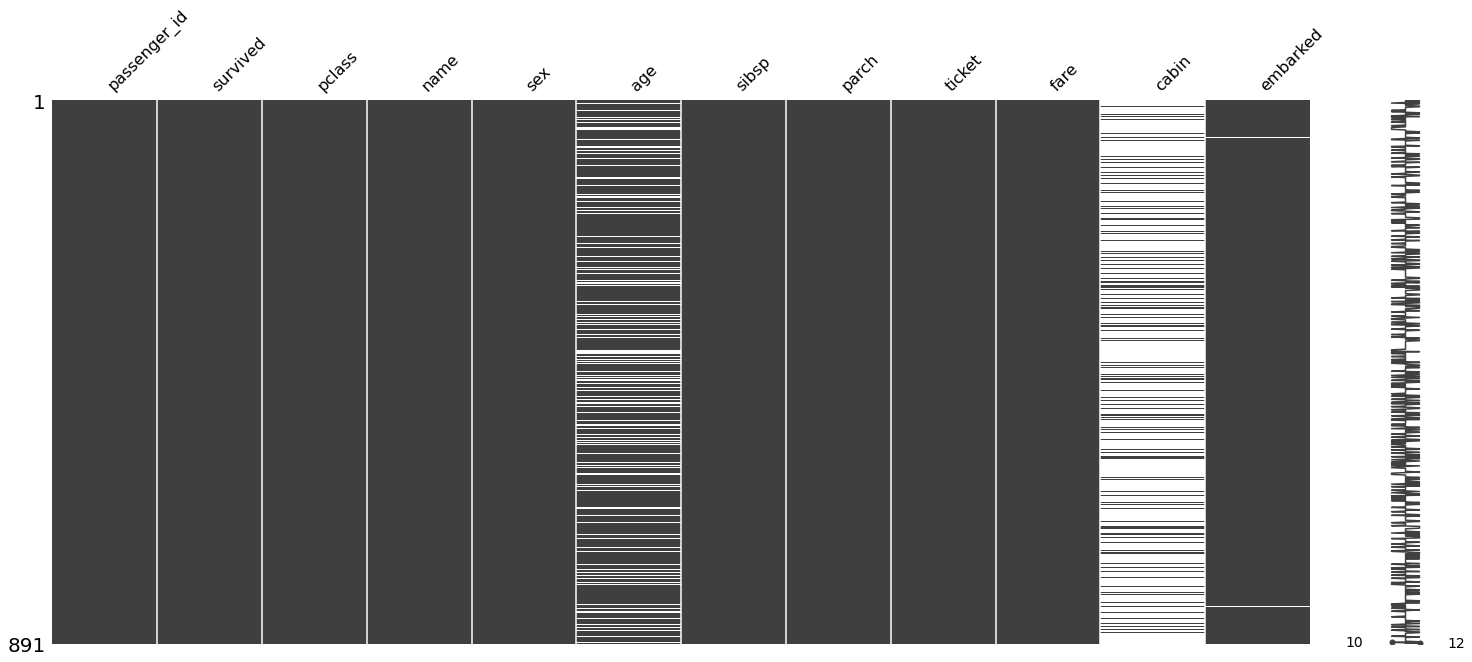

In [45]:
# Missing data in training set

missingno.matrix(train)

<AxesSubplot:>

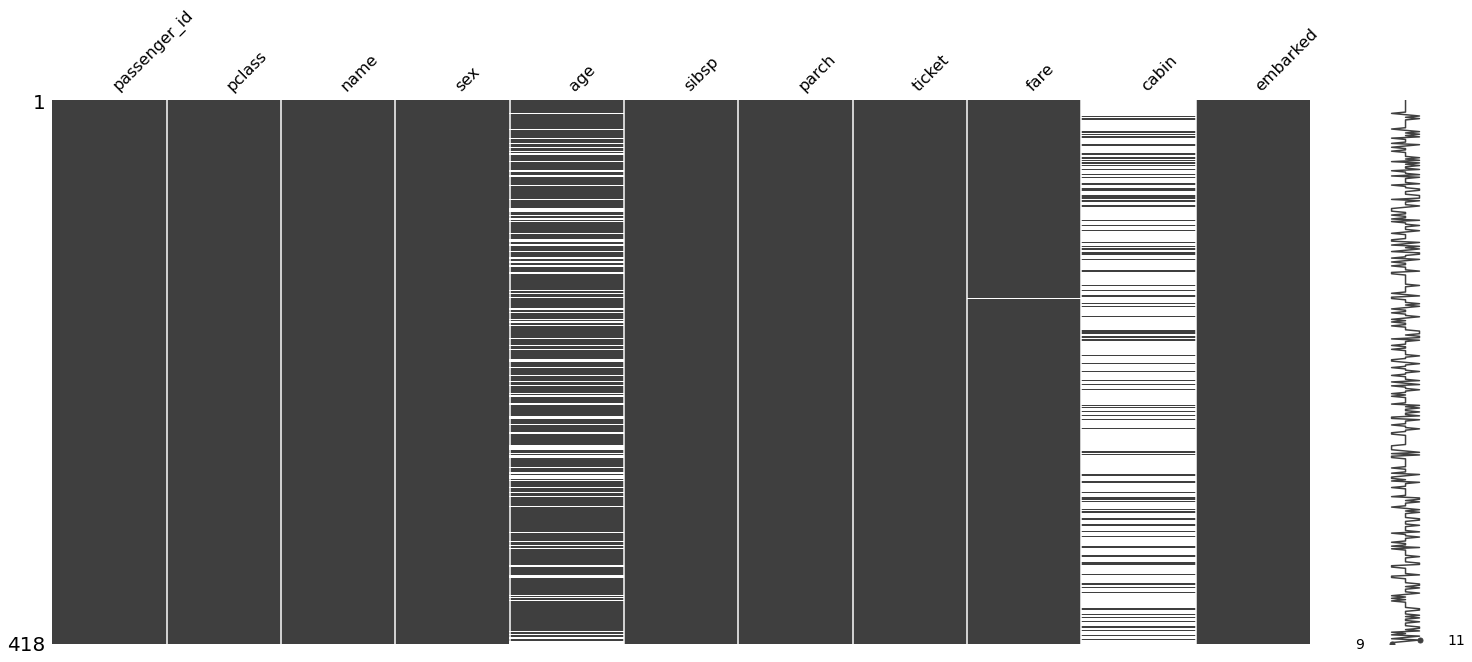

In [46]:
# Missing data in training set

missingno.matrix(test)

In [47]:
# Summary statistics for training set 

train.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# Summary statistics for training set 

test.describe()

,passenger_id,pclass,age,sibsp,parch,fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
# Value counts of the sex column

train['sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: sex, dtype: int64

In [51]:
# Mean of survival by sex

train[['sex', 'survived']].groupby('sex', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sex,survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

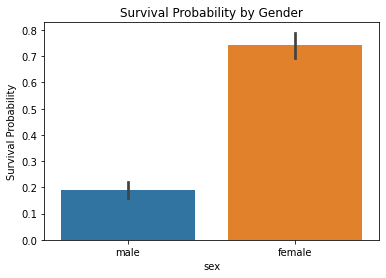

In [52]:
sns.barplot(x = 'sex', y ='survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

In [53]:
# Value counts of the Pclass column 

train['pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: pclass, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

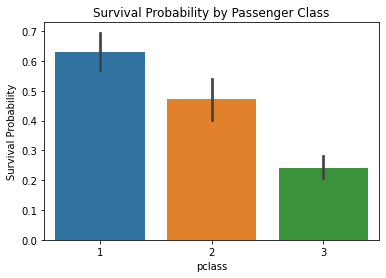

In [54]:
sns.barplot(x = 'pclass', y ='survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

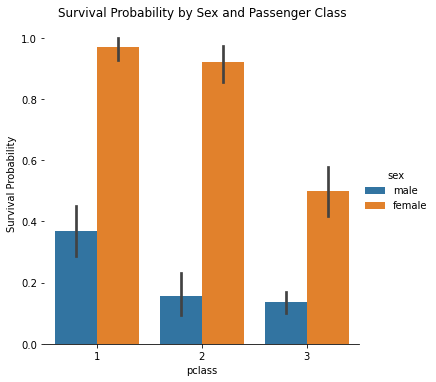

In [55]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'pclass', y = 'survived', hue = 'sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [56]:
 # Value counts of the Embarked column 

train['embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

In [57]:
# Mean of survival by point of embarkation

train[['embarked', 'survived']].groupby(['embarked'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

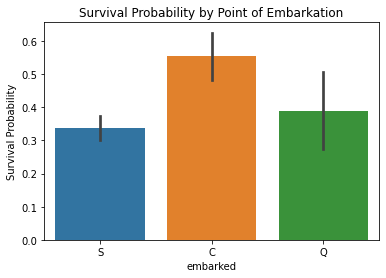

In [58]:
sns.barplot(x = 'embarked', y ='survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

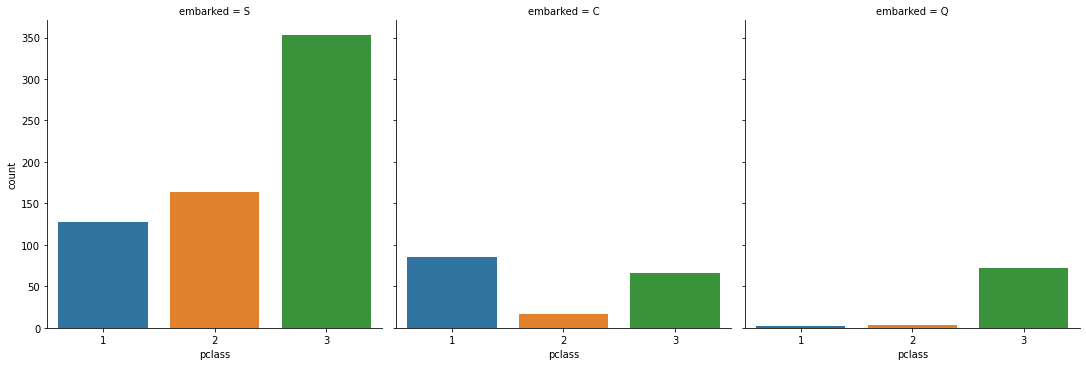

In [59]:
sns.factorplot('pclass', col = 'embarked', data = train, kind = 'count')

In [60]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['age', 'sibsp', 'parch', 'fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [61]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [62]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<AxesSubplot:>

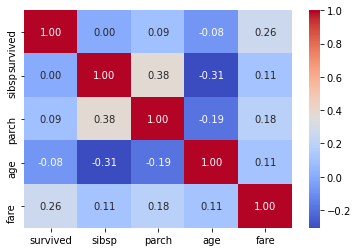

In [63]:
sns.heatmap(train[['survived', 'sibsp', 'parch', 'age', 'fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [64]:
# Value counts of the SibSp column 

train['sibsp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: sibsp, dtype: int64

In [65]:
# Mean of survival by SibSp

train[['sibsp', 'survived']].groupby('sibsp', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

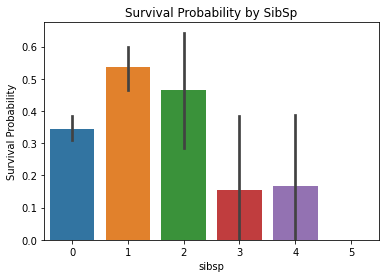

In [66]:
sns.barplot(x = 'sibsp', y ='survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [67]:
# Value counts of the Parch column 

train['parch'].value_counts(dropna = False)

0    678
1    118
2     70
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

In [68]:
# Mean of survival by Parch

train[['parch', 'survived']].groupby('parch', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [69]:
# Null values in Age column 

train['age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

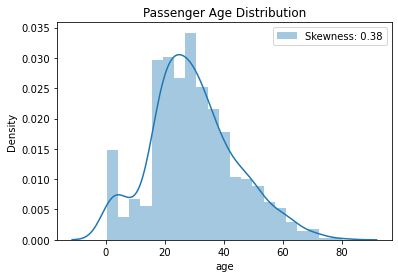

In [70]:
# Passenger age distribution

sns.distplot(train['age'], label = 'Skewness: %.2f'%(train['age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

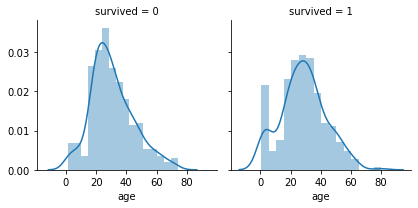

In [71]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'survived')
g.map(sns.distplot, 'age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

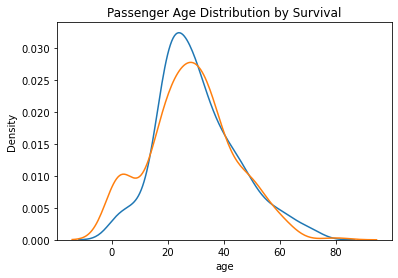

In [72]:
sns.kdeplot(train['age'][train['survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['age'][train['survived'] == 1], label = 'survived')
plt.xlabel('age')
plt.title('Passenger Age Distribution by Survival')

In [73]:
# Null values of Fare column 

train['fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

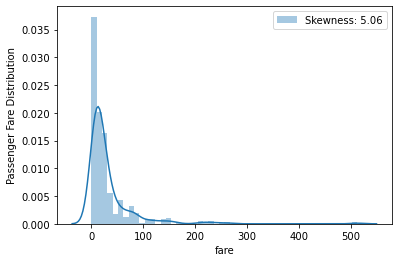

In [74]:
# Passenger fare distribution

sns.distplot(train['fare'], label = 'Skewness: %.2f'%(train['fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [75]:
# Drop ticket and cabin features from training and test set

train = train.drop(['ticket', 'cabin'], axis = 1)
test = test.drop(['ticket', 'cabin'], axis = 1)

In [76]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

age             170
embarked          2
passenger_id      0
survived          0
pclass            0
name              0
sex               0
sibsp             0
parch             0
fare              0
dtype: int64

In [77]:
# Compute the most frequent value of Embarked in training set

mode = train['embarked'].dropna().mode()[0]
mode

'S'

In [78]:
# Compute median of Fare in test set 

median = test['fare'].dropna().median()
median

14.4542

In [79]:
# Fill missing value in Fare with median

test['fare'].fillna(median, inplace = True)

In [80]:
# Missing values in training set 

test.isnull().sum().sort_values(ascending = False)

age             86
passenger_id     0
pclass           0
name             0
sex              0
sibsp            0
parch            0
fare             0
embarked         0
dtype: int64

In [81]:
# Compute the most frequent value of Embarked in test set

mode = test['embarked'].dropna().mode()[0]
mode

'S'

In [82]:
# Fill missing value in Embarked with mode

test['embarked'].fillna(mode, inplace = True)

In [83]:
# Compute median of Fare in test set 

median = train['fare'].dropna().median()
median

14.4542

In [84]:
# Fill missing value in Fare with median

train['fare'].fillna(median, inplace = True)

In [85]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

age             170
embarked          2
passenger_id      0
survived          0
pclass            0
name              0
sex               0
sibsp             0
parch             0
fare              0
dtype: int64

In [86]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [87]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

survived        418
age             256
embarked          2
passenger_id      0
pclass            0
name              0
sex               0
sibsp             0
parch             0
fare              0
dtype: int64

In [88]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['sex'] = combine['sex'].map({'male': 0, 'female': 1})

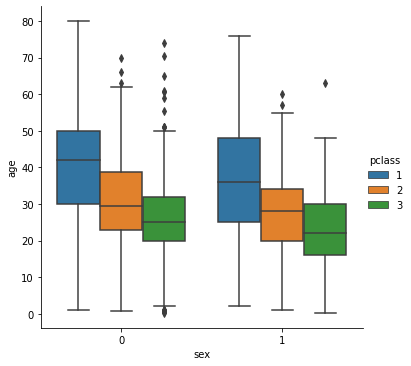

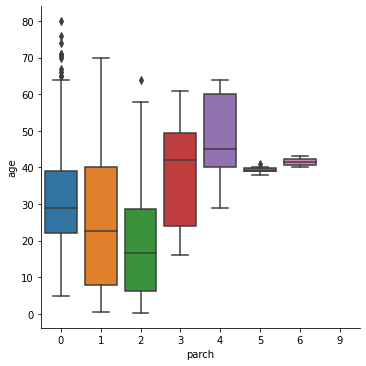

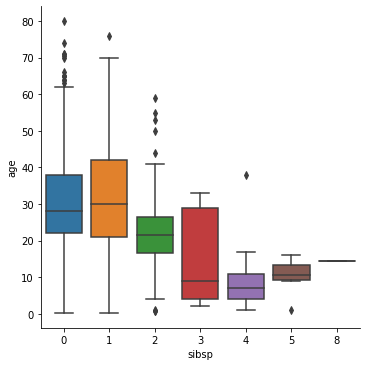

In [89]:
sns.factorplot(y = 'age', x = 'sex', hue = 'pclass', kind = 'box', data = combine)
sns.factorplot(y = 'age', x = 'parch', kind = 'box', data = combine)
sns.factorplot(y = 'age', x = 'sibsp', kind = 'box', data = combine)

<AxesSubplot:>

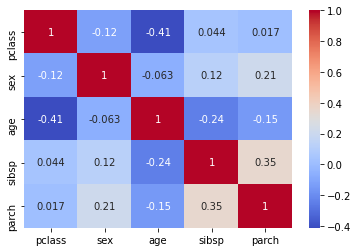

In [90]:
sns.heatmap(combine.drop(['survived', 'name', 'passenger_id', 'fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [91]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['age'].isnull()].index)
len(age_nan_indices)

256

In [92]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['age'].median()
    predict_age = combine['age'][(combine['sibsp'] == combine.iloc[index]['sibsp']) 
                                 & (combine['parch'] == combine.iloc[index]['parch'])
                                 & (combine['pclass'] == combine.iloc[index]["pclass"])].median()
    if np.isnan(predict_age):
        combine['age'].iloc[index] = median_age
    else:
        combine['age'].iloc[index] = predict_age

In [93]:
# Make sure there is no more missing ages 

combine['age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

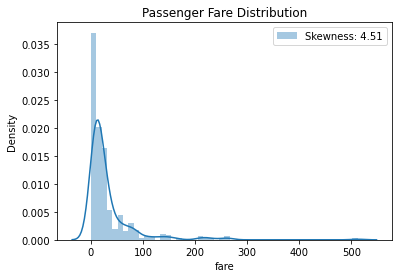

In [94]:
# Passenger fare distribution

sns.distplot(combine['fare'], label = 'Skewness: %.2f'%(combine['fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [95]:
# Apply log transformation to Fare column to reduce skewness

combine['fare'] = combine['fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

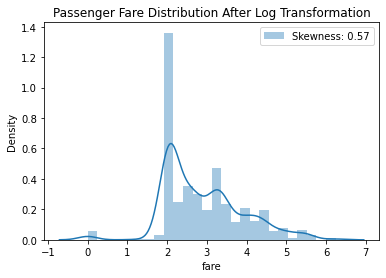

In [96]:
# Passenger fare distribution after log transformation

sns.distplot(combine['fare'], label = 'Skewness: %.2f'%(combine['fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [97]:
combine.head()

,passenger_id,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [98]:
# Get title from name

combine['title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['name']]
combine[['name', 'title']].head()

,name,title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [99]:
# Value counts of Title

combine['title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Don               1
Lady              1
Dona              1
the Countess      1
Mme               1
Capt              1
Sir               1
Jonkheer          1
Name: title, dtype: int64

In [100]:
# Number of unique Title

combine['title'].nunique()

18

In [101]:
# Simplify title

combine['title'] = combine['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['title'] = combine['title'].replace(['Mlle', 'Ms'], 'Miss')
combine['title'] = combine['title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='title', ylabel='count'>

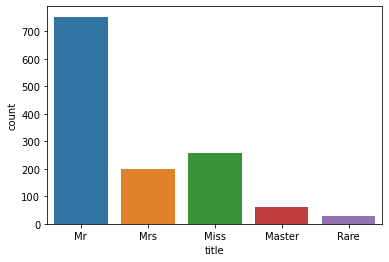

In [102]:
sns.countplot(combine['title'])

In [103]:
# Mean of survival by name title

combine[['title', 'survived']].groupby(['title'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,title,survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

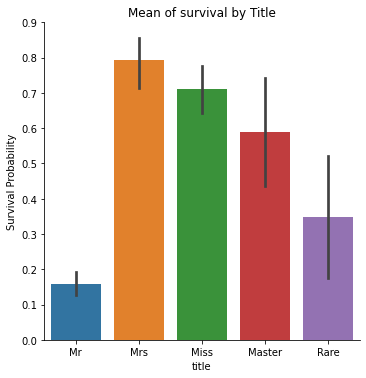

In [104]:
sns.factorplot(x = 'title', y = 'survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [105]:
# Drop name column

combine = combine.drop('name', axis = 1)
combine.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [106]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['sibsp'] + combine['parch'] + 1
combine[['sibsp', 'parch', 'FamilySize']].head(10)

,sibsp,parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [107]:
# Mean of survival by family size

combine[['FamilySize', 'survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'survived', ascending = False)

,FamilySize,survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [108]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [109]:
 #Mean of survival by IsAlone

combine[['IsAlone', 'survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'survived', ascending = False)


,IsAlone,survived
0,0,0.514535
1,1,0.303538


In [110]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['sibsp', 'parch', 'FamilySize'], axis = 1)
combine.head()

,passenger_id,survived,pclass,sex,age,fare,embarked,title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [111]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['age'], 5)
combine[['AgeBand', 'survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [112]:
# Assign ordinals to each age band 

combine.loc[combine['age'] <= 16.136, 'age'] = 0
combine.loc[(combine['age'] > 16.136) & (combine['age'] <= 32.102), 'age'] = 1
combine.loc[(combine['age'] > 32.102) & (combine['age'] <= 48.068), 'age'] = 2
combine.loc[(combine['age'] > 48.068) & (combine['age'] <= 64.034), 'age'] = 3
combine.loc[combine['age'] > 64.034 , 'age'] = 4

In [113]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [114]:
# Age and Pclass data types 

combine[['age', 'pclass']].dtypes

age       float64
pclass      int64
dtype: object

In [115]:
# Convert ordinal Age into integer

combine['age'] = combine['age'].astype('int')
combine['age'].dtype

dtype('int32')

In [116]:
# Create Age*Class feature

combine['age*Class'] = combine['age'] * combine['pclass']
combine[['age', 'pclass', 'age*Class']].head()

,age,pclass,age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [117]:
combine.head()

,passenger_id,survived,pclass,sex,age,fare,embarked,title,IsAlone,age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [118]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['title'])
combine = pd.get_dummies(combine, columns = ['embarked'], prefix = 'Em')
combine.head()

,passenger_id,survived,pclass,sex,age,fare,IsAlone,age*Class,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [119]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['fare'], 4)
combine[['FareBand', 'survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [120]:
# Assign ordinal to each fare band

combine.loc[combine['fare'] <= 1.56, 'fare'] = 0
combine.loc[(combine['fare'] > 1.56) & (combine['fare'] <= 3.119), 'fare'] = 1
combine.loc[(combine['fare'] > 3.119) & (combine['fare'] <= 4.679), 'fare'] = 2
combine.loc[combine['fare'] > 4.679, 'fare'] = 3

In [121]:
# Convert Fare into integer

combine['fare'] = combine['fare'].astype('int')

In [122]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [123]:
combine.head()

,passenger_id,survived,pclass,sex,age,fare,IsAlone,age*Class,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [124]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [125]:
train.head()

,passenger_id,survived,pclass,sex,age,fare,IsAlone,age*Class,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [126]:
# Drop passenger ID column from and training set

train = train.drop('passenger_id', axis = 1)
train.head()

,survived,pclass,sex,age,fare,IsAlone,age*Class,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [127]:
# Convert survived back to integer in the training set

train['survived'] = train['survived'].astype('int')
train.head()

,survived,pclass,sex,age,fare,IsAlone,age*Class,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [128]:
test.head()

,passenger_id,survived,pclass,sex,age,fare,IsAlone,age*Class,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [129]:
# Drop passenger survived column from test set

test = test.drop('survived', axis = 1)
test.head()

,passenger_id,pclass,sex,age,fare,IsAlone,age*Class,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [130]:
X_train = train.drop('survived', axis = 1)
Y_train = train['survived']
X_test = test.drop('passenger_id', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [131]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

In [132]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [133]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.79

In [134]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

In [135]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

In [136]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [137]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.37

In [138]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [139]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

In [140]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 142ms	remaining: 2m 22s
1:	learn: 0.6798485	total: 145ms	remaining: 1m 12s
2:	learn: 0.6729520	total: 147ms	remaining: 48.8s
3:	learn: 0.6669729	total: 149ms	remaining: 37.2s
4:	learn: 0.6607853	total: 152ms	remaining: 30.2s
5:	learn: 0.6554568	total: 154ms	remaining: 25.6s
6:	learn: 0.6500727	total: 157ms	remaining: 22.2s
7:	learn: 0.6437982	total: 158ms	remaining: 19.6s
8:	learn: 0.6398272	total: 160ms	remaining: 17.6s
9:	learn: 0.6351585	total: 162ms	remaining: 16s
10:	learn: 0.6305929	total: 163ms	remaining: 14.7s
11:	learn: 0.6252234	total: 165ms	remaining: 13.6s
12:	learn: 0.6203125	total: 166ms	remaining: 12.6s
13:	learn: 0.6163212	total: 168ms	remaining: 11.8s
14:	learn: 0.6126713	total: 169ms	remaining: 11.1s
15:	learn: 0.6078477	total: 171ms	remaining: 10.5s
16:	learn: 0.6033471	total: 172ms	remaining: 9.97s
17:	learn: 0.5984360	total: 174ms	remaining: 9.5s
18:	learn: 0.5935116	total: 176ms	remaining: 9.06s
19:	learn: 0.

247:	learn: 0.3747970	total: 498ms	remaining: 1.51s
248:	learn: 0.3745835	total: 500ms	remaining: 1.51s
249:	learn: 0.3745724	total: 501ms	remaining: 1.5s
250:	learn: 0.3744349	total: 502ms	remaining: 1.5s
251:	learn: 0.3742372	total: 503ms	remaining: 1.49s
252:	learn: 0.3741465	total: 504ms	remaining: 1.49s
253:	learn: 0.3740209	total: 506ms	remaining: 1.49s
254:	learn: 0.3738615	total: 507ms	remaining: 1.48s
255:	learn: 0.3737101	total: 508ms	remaining: 1.48s
256:	learn: 0.3736512	total: 510ms	remaining: 1.47s
257:	learn: 0.3735831	total: 511ms	remaining: 1.47s
258:	learn: 0.3734549	total: 512ms	remaining: 1.47s
259:	learn: 0.3732719	total: 514ms	remaining: 1.46s
260:	learn: 0.3731215	total: 515ms	remaining: 1.46s
261:	learn: 0.3730076	total: 517ms	remaining: 1.46s
262:	learn: 0.3728060	total: 518ms	remaining: 1.45s
263:	learn: 0.3726089	total: 520ms	remaining: 1.45s
264:	learn: 0.3725393	total: 521ms	remaining: 1.45s
265:	learn: 0.3723222	total: 523ms	remaining: 1.44s
266:	learn: 0.

470:	learn: 0.3544755	total: 809ms	remaining: 908ms
471:	learn: 0.3544327	total: 810ms	remaining: 906ms
472:	learn: 0.3543662	total: 812ms	remaining: 905ms
473:	learn: 0.3543431	total: 813ms	remaining: 903ms
474:	learn: 0.3542958	total: 815ms	remaining: 901ms
475:	learn: 0.3542688	total: 816ms	remaining: 899ms
476:	learn: 0.3541922	total: 818ms	remaining: 896ms
477:	learn: 0.3540841	total: 819ms	remaining: 895ms
478:	learn: 0.3540360	total: 820ms	remaining: 892ms
479:	learn: 0.3540014	total: 822ms	remaining: 890ms
480:	learn: 0.3539402	total: 823ms	remaining: 888ms
481:	learn: 0.3538909	total: 825ms	remaining: 886ms
482:	learn: 0.3538169	total: 827ms	remaining: 885ms
483:	learn: 0.3537531	total: 829ms	remaining: 883ms
484:	learn: 0.3536803	total: 830ms	remaining: 882ms
485:	learn: 0.3536550	total: 832ms	remaining: 880ms
486:	learn: 0.3536306	total: 833ms	remaining: 878ms
487:	learn: 0.3536276	total: 834ms	remaining: 875ms
488:	learn: 0.3535189	total: 836ms	remaining: 874ms
489:	learn: 

699:	learn: 0.3441199	total: 1.13s	remaining: 484ms
700:	learn: 0.3441161	total: 1.13s	remaining: 483ms
701:	learn: 0.3440657	total: 1.13s	remaining: 481ms
702:	learn: 0.3440230	total: 1.13s	remaining: 479ms
703:	learn: 0.3439963	total: 1.14s	remaining: 478ms
704:	learn: 0.3439722	total: 1.14s	remaining: 476ms
705:	learn: 0.3439471	total: 1.14s	remaining: 474ms
706:	learn: 0.3439432	total: 1.14s	remaining: 472ms
707:	learn: 0.3438853	total: 1.14s	remaining: 471ms
708:	learn: 0.3438236	total: 1.14s	remaining: 469ms
709:	learn: 0.3437831	total: 1.14s	remaining: 467ms
710:	learn: 0.3437383	total: 1.15s	remaining: 466ms
711:	learn: 0.3437077	total: 1.15s	remaining: 464ms
712:	learn: 0.3436627	total: 1.15s	remaining: 462ms
713:	learn: 0.3436073	total: 1.15s	remaining: 460ms
714:	learn: 0.3435757	total: 1.15s	remaining: 459ms
715:	learn: 0.3435250	total: 1.15s	remaining: 457ms
716:	learn: 0.3434885	total: 1.15s	remaining: 455ms
717:	learn: 0.3434665	total: 1.16s	remaining: 454ms
718:	learn: 

932:	learn: 0.3349603	total: 1.46s	remaining: 105ms
933:	learn: 0.3349164	total: 1.46s	remaining: 103ms
934:	learn: 0.3348978	total: 1.46s	remaining: 101ms
935:	learn: 0.3348656	total: 1.46s	remaining: 99.8ms
936:	learn: 0.3348175	total: 1.46s	remaining: 98.2ms
937:	learn: 0.3347769	total: 1.46s	remaining: 96.7ms
938:	learn: 0.3347410	total: 1.46s	remaining: 95.1ms
939:	learn: 0.3347250	total: 1.47s	remaining: 93.5ms
940:	learn: 0.3346828	total: 1.47s	remaining: 92ms
941:	learn: 0.3346674	total: 1.47s	remaining: 90.4ms
942:	learn: 0.3346424	total: 1.47s	remaining: 88.8ms
943:	learn: 0.3346106	total: 1.47s	remaining: 87.3ms
944:	learn: 0.3345706	total: 1.47s	remaining: 85.7ms
945:	learn: 0.3345525	total: 1.47s	remaining: 84.1ms
946:	learn: 0.3345089	total: 1.48s	remaining: 82.6ms
947:	learn: 0.3344790	total: 1.48s	remaining: 81ms
948:	learn: 0.3344433	total: 1.48s	remaining: 79.5ms
949:	learn: 0.3344013	total: 1.48s	remaining: 77.9ms
950:	learn: 0.3343918	total: 1.48s	remaining: 76.3ms


In [141]:
acc_catboost

85.7

In [142]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.79
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,75.37


In [143]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [144]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 1.36ms	remaining: 1.36s
1:	learn: 0.6803102	total: 2.79ms	remaining: 1.39s
2:	learn: 0.6743326	total: 4.38ms	remaining: 1.46s
3:	learn: 0.6684760	total: 5.81ms	remaining: 1.45s
4:	learn: 0.6624557	total: 7.19ms	remaining: 1.43s
5:	learn: 0.6573314	total: 8.62ms	remaining: 1.43s
6:	learn: 0.6520748	total: 10ms	remaining: 1.42s
7:	learn: 0.6460856	total: 11.4ms	remaining: 1.41s
8:	learn: 0.6422711	total: 12.5ms	remaining: 1.37s
9:	learn: 0.6376804	total: 13.7ms	remaining: 1.36s
10:	learn: 0.6326505	total: 15.1ms	remaining: 1.35s
11:	learn: 0.6272296	total: 16.4ms	remaining: 1.35s
12:	learn: 0.6224692	total: 17.8ms	remaining: 1.35s
13:	learn: 0.6175146	total: 19.4ms	remaining: 1.36s
14:	learn: 0.6124366	total: 20.8ms	remaining: 1.37s
15:	learn: 0.6097835	total: 21.8ms	remaining: 1.34s
16:	learn: 0.6050506	total: 23.3ms	remaining: 1.34s
17:	learn: 0.6004900	total: 24.8ms	remaining: 1.35s
18:	learn: 0.5958590	total: 26.2ms	remaining: 

228:	learn: 0.3744271	total: 318ms	remaining: 1.07s
229:	learn: 0.3741905	total: 320ms	remaining: 1.07s
230:	learn: 0.3739542	total: 321ms	remaining: 1.07s
231:	learn: 0.3737881	total: 323ms	remaining: 1.07s
232:	learn: 0.3735965	total: 324ms	remaining: 1.07s
233:	learn: 0.3733934	total: 325ms	remaining: 1.06s
234:	learn: 0.3732875	total: 327ms	remaining: 1.06s
235:	learn: 0.3732274	total: 328ms	remaining: 1.06s
236:	learn: 0.3730688	total: 330ms	remaining: 1.06s
237:	learn: 0.3728815	total: 331ms	remaining: 1.06s
238:	learn: 0.3726695	total: 332ms	remaining: 1.06s
239:	learn: 0.3724893	total: 334ms	remaining: 1.06s
240:	learn: 0.3724836	total: 335ms	remaining: 1.05s
241:	learn: 0.3723806	total: 336ms	remaining: 1.05s
242:	learn: 0.3722857	total: 337ms	remaining: 1.05s
243:	learn: 0.3720521	total: 339ms	remaining: 1.05s
244:	learn: 0.3717612	total: 340ms	remaining: 1.05s
245:	learn: 0.3715255	total: 341ms	remaining: 1.05s
246:	learn: 0.3713195	total: 343ms	remaining: 1.04s
247:	learn: 

469:	learn: 0.3485936	total: 641ms	remaining: 723ms
470:	learn: 0.3484841	total: 643ms	remaining: 722ms
471:	learn: 0.3484467	total: 644ms	remaining: 720ms
472:	learn: 0.3483884	total: 646ms	remaining: 719ms
473:	learn: 0.3483499	total: 647ms	remaining: 718ms
474:	learn: 0.3482470	total: 648ms	remaining: 717ms
475:	learn: 0.3481993	total: 650ms	remaining: 715ms
476:	learn: 0.3481153	total: 651ms	remaining: 714ms
477:	learn: 0.3480401	total: 652ms	remaining: 713ms
478:	learn: 0.3479642	total: 654ms	remaining: 711ms
479:	learn: 0.3478738	total: 655ms	remaining: 710ms
480:	learn: 0.3477691	total: 657ms	remaining: 709ms
481:	learn: 0.3476902	total: 658ms	remaining: 707ms
482:	learn: 0.3476790	total: 659ms	remaining: 705ms
483:	learn: 0.3476715	total: 660ms	remaining: 704ms
484:	learn: 0.3476260	total: 661ms	remaining: 702ms
485:	learn: 0.3475861	total: 663ms	remaining: 701ms
486:	learn: 0.3474830	total: 664ms	remaining: 700ms
487:	learn: 0.3474551	total: 666ms	remaining: 699ms
488:	learn: 

720:	learn: 0.3351888	total: 973ms	remaining: 376ms
721:	learn: 0.3351348	total: 975ms	remaining: 375ms
722:	learn: 0.3350832	total: 976ms	remaining: 374ms
723:	learn: 0.3350152	total: 977ms	remaining: 373ms
724:	learn: 0.3350040	total: 978ms	remaining: 371ms
725:	learn: 0.3349818	total: 980ms	remaining: 370ms
726:	learn: 0.3349102	total: 981ms	remaining: 368ms
727:	learn: 0.3349002	total: 982ms	remaining: 367ms
728:	learn: 0.3347993	total: 984ms	remaining: 366ms
729:	learn: 0.3347570	total: 985ms	remaining: 364ms
730:	learn: 0.3347319	total: 986ms	remaining: 363ms
731:	learn: 0.3346707	total: 988ms	remaining: 362ms
732:	learn: 0.3346022	total: 989ms	remaining: 360ms
733:	learn: 0.3345456	total: 991ms	remaining: 359ms
734:	learn: 0.3345026	total: 992ms	remaining: 358ms
735:	learn: 0.3344559	total: 994ms	remaining: 357ms
736:	learn: 0.3344290	total: 996ms	remaining: 355ms
737:	learn: 0.3343815	total: 997ms	remaining: 354ms
738:	learn: 0.3343387	total: 998ms	remaining: 353ms
739:	learn: 

950:	learn: 0.3252533	total: 1.29s	remaining: 66.4ms
951:	learn: 0.3252086	total: 1.29s	remaining: 65.1ms
952:	learn: 0.3251811	total: 1.29s	remaining: 63.8ms
953:	learn: 0.3251299	total: 1.29s	remaining: 62.4ms
954:	learn: 0.3250934	total: 1.29s	remaining: 61.1ms
955:	learn: 0.3250606	total: 1.3s	remaining: 59.7ms
956:	learn: 0.3250364	total: 1.3s	remaining: 58.3ms
957:	learn: 0.3249824	total: 1.3s	remaining: 57ms
958:	learn: 0.3249392	total: 1.3s	remaining: 55.6ms
959:	learn: 0.3249031	total: 1.3s	remaining: 54.3ms
960:	learn: 0.3248580	total: 1.3s	remaining: 52.9ms
961:	learn: 0.3248195	total: 1.3s	remaining: 51.6ms
962:	learn: 0.3248011	total: 1.31s	remaining: 50.2ms
963:	learn: 0.3247874	total: 1.31s	remaining: 48.9ms
964:	learn: 0.3247378	total: 1.31s	remaining: 47.5ms
965:	learn: 0.3247123	total: 1.31s	remaining: 46.2ms
966:	learn: 0.3246322	total: 1.31s	remaining: 44.8ms
967:	learn: 0.3245860	total: 1.31s	remaining: 43.4ms
968:	learn: 0.3245448	total: 1.31s	remaining: 42.1ms
96

143:	learn: 0.4049666	total: 192ms	remaining: 1.14s
144:	learn: 0.4044475	total: 194ms	remaining: 1.15s
145:	learn: 0.4042806	total: 196ms	remaining: 1.14s
146:	learn: 0.4041805	total: 197ms	remaining: 1.14s
147:	learn: 0.4035102	total: 198ms	remaining: 1.14s
148:	learn: 0.4029656	total: 199ms	remaining: 1.14s
149:	learn: 0.4027322	total: 200ms	remaining: 1.14s
150:	learn: 0.4021169	total: 202ms	remaining: 1.13s
151:	learn: 0.4017116	total: 203ms	remaining: 1.13s
152:	learn: 0.4010799	total: 204ms	remaining: 1.13s
153:	learn: 0.4006531	total: 206ms	remaining: 1.13s
154:	learn: 0.4002839	total: 207ms	remaining: 1.13s
155:	learn: 0.3997243	total: 209ms	remaining: 1.13s
156:	learn: 0.3991654	total: 210ms	remaining: 1.13s
157:	learn: 0.3986511	total: 212ms	remaining: 1.13s
158:	learn: 0.3981439	total: 213ms	remaining: 1.13s
159:	learn: 0.3976878	total: 214ms	remaining: 1.13s
160:	learn: 0.3972367	total: 216ms	remaining: 1.12s
161:	learn: 0.3970496	total: 218ms	remaining: 1.13s
162:	learn: 

351:	learn: 0.3637067	total: 510ms	remaining: 939ms
352:	learn: 0.3635282	total: 512ms	remaining: 939ms
353:	learn: 0.3633905	total: 514ms	remaining: 937ms
354:	learn: 0.3632930	total: 515ms	remaining: 936ms
355:	learn: 0.3631898	total: 516ms	remaining: 934ms
356:	learn: 0.3631568	total: 517ms	remaining: 932ms
357:	learn: 0.3631407	total: 518ms	remaining: 930ms
358:	learn: 0.3630620	total: 520ms	remaining: 928ms
359:	learn: 0.3629402	total: 521ms	remaining: 927ms
360:	learn: 0.3628175	total: 523ms	remaining: 925ms
361:	learn: 0.3627213	total: 524ms	remaining: 924ms
362:	learn: 0.3626460	total: 526ms	remaining: 922ms
363:	learn: 0.3625801	total: 527ms	remaining: 921ms
364:	learn: 0.3625407	total: 528ms	remaining: 919ms
365:	learn: 0.3623954	total: 530ms	remaining: 918ms
366:	learn: 0.3623629	total: 531ms	remaining: 916ms
367:	learn: 0.3622870	total: 532ms	remaining: 914ms
368:	learn: 0.3621586	total: 534ms	remaining: 913ms
369:	learn: 0.3620508	total: 536ms	remaining: 912ms
370:	learn: 

536:	learn: 0.3506341	total: 811ms	remaining: 700ms
537:	learn: 0.3505973	total: 813ms	remaining: 698ms
538:	learn: 0.3505453	total: 815ms	remaining: 697ms
539:	learn: 0.3504224	total: 817ms	remaining: 696ms
540:	learn: 0.3503386	total: 818ms	remaining: 694ms
541:	learn: 0.3502993	total: 820ms	remaining: 693ms
542:	learn: 0.3502690	total: 821ms	remaining: 691ms
543:	learn: 0.3502159	total: 823ms	remaining: 690ms
544:	learn: 0.3501346	total: 825ms	remaining: 689ms
545:	learn: 0.3500534	total: 827ms	remaining: 688ms
546:	learn: 0.3500335	total: 828ms	remaining: 686ms
547:	learn: 0.3500283	total: 830ms	remaining: 685ms
548:	learn: 0.3499785	total: 831ms	remaining: 683ms
549:	learn: 0.3499672	total: 833ms	remaining: 681ms
550:	learn: 0.3499177	total: 834ms	remaining: 680ms
551:	learn: 0.3498495	total: 837ms	remaining: 679ms
552:	learn: 0.3497522	total: 839ms	remaining: 678ms
553:	learn: 0.3497493	total: 841ms	remaining: 677ms
554:	learn: 0.3497068	total: 843ms	remaining: 676ms
555:	learn: 

713:	learn: 0.3425037	total: 1.12s	remaining: 449ms
714:	learn: 0.3424823	total: 1.12s	remaining: 447ms
715:	learn: 0.3424235	total: 1.12s	remaining: 445ms
716:	learn: 0.3423758	total: 1.12s	remaining: 444ms
717:	learn: 0.3423300	total: 1.13s	remaining: 442ms
718:	learn: 0.3422690	total: 1.13s	remaining: 441ms
719:	learn: 0.3422027	total: 1.13s	remaining: 439ms
720:	learn: 0.3421310	total: 1.13s	remaining: 438ms
721:	learn: 0.3421046	total: 1.13s	remaining: 436ms
722:	learn: 0.3420309	total: 1.13s	remaining: 435ms
723:	learn: 0.3419887	total: 1.14s	remaining: 433ms
724:	learn: 0.3419109	total: 1.14s	remaining: 431ms
725:	learn: 0.3418709	total: 1.14s	remaining: 430ms
726:	learn: 0.3418091	total: 1.14s	remaining: 428ms
727:	learn: 0.3417533	total: 1.14s	remaining: 427ms
728:	learn: 0.3416949	total: 1.14s	remaining: 425ms
729:	learn: 0.3416393	total: 1.15s	remaining: 424ms
730:	learn: 0.3415887	total: 1.15s	remaining: 422ms
731:	learn: 0.3415478	total: 1.15s	remaining: 421ms
732:	learn: 

920:	learn: 0.3337990	total: 1.44s	remaining: 124ms
921:	learn: 0.3337474	total: 1.45s	remaining: 122ms
922:	learn: 0.3337107	total: 1.45s	remaining: 121ms
923:	learn: 0.3336608	total: 1.45s	remaining: 119ms
924:	learn: 0.3336370	total: 1.45s	remaining: 118ms
925:	learn: 0.3335818	total: 1.45s	remaining: 116ms
926:	learn: 0.3335529	total: 1.45s	remaining: 114ms
927:	learn: 0.3335172	total: 1.45s	remaining: 113ms
928:	learn: 0.3334816	total: 1.46s	remaining: 111ms
929:	learn: 0.3334223	total: 1.46s	remaining: 110ms
930:	learn: 0.3333895	total: 1.46s	remaining: 108ms
931:	learn: 0.3333845	total: 1.46s	remaining: 107ms
932:	learn: 0.3333585	total: 1.46s	remaining: 105ms
933:	learn: 0.3333395	total: 1.46s	remaining: 103ms
934:	learn: 0.3333332	total: 1.46s	remaining: 102ms
935:	learn: 0.3332756	total: 1.47s	remaining: 100ms
936:	learn: 0.3332577	total: 1.47s	remaining: 98.7ms
937:	learn: 0.3332019	total: 1.47s	remaining: 97.1ms
938:	learn: 0.3331851	total: 1.47s	remaining: 95.6ms
939:	lear

105:	learn: 0.4062814	total: 146ms	remaining: 1.23s
106:	learn: 0.4055532	total: 148ms	remaining: 1.23s
107:	learn: 0.4049442	total: 149ms	remaining: 1.23s
108:	learn: 0.4040722	total: 150ms	remaining: 1.23s
109:	learn: 0.4031736	total: 152ms	remaining: 1.23s
110:	learn: 0.4027929	total: 153ms	remaining: 1.22s
111:	learn: 0.4020918	total: 154ms	remaining: 1.22s
112:	learn: 0.4014445	total: 155ms	remaining: 1.22s
113:	learn: 0.4004211	total: 157ms	remaining: 1.22s
114:	learn: 0.3999325	total: 158ms	remaining: 1.22s
115:	learn: 0.3990793	total: 160ms	remaining: 1.22s
116:	learn: 0.3983253	total: 161ms	remaining: 1.22s
117:	learn: 0.3975949	total: 163ms	remaining: 1.21s
118:	learn: 0.3971699	total: 164ms	remaining: 1.21s
119:	learn: 0.3968028	total: 165ms	remaining: 1.21s
120:	learn: 0.3962681	total: 166ms	remaining: 1.21s
121:	learn: 0.3954652	total: 168ms	remaining: 1.21s
122:	learn: 0.3945417	total: 169ms	remaining: 1.21s
123:	learn: 0.3941267	total: 170ms	remaining: 1.2s
124:	learn: 0

340:	learn: 0.3452852	total: 464ms	remaining: 897ms
341:	learn: 0.3451847	total: 466ms	remaining: 897ms
342:	learn: 0.3450863	total: 468ms	remaining: 896ms
343:	learn: 0.3449123	total: 469ms	remaining: 894ms
344:	learn: 0.3449001	total: 470ms	remaining: 892ms
345:	learn: 0.3447886	total: 471ms	remaining: 891ms
346:	learn: 0.3446413	total: 473ms	remaining: 890ms
347:	learn: 0.3445345	total: 474ms	remaining: 888ms
348:	learn: 0.3444404	total: 476ms	remaining: 887ms
349:	learn: 0.3443329	total: 477ms	remaining: 886ms
350:	learn: 0.3441267	total: 478ms	remaining: 885ms
351:	learn: 0.3441043	total: 480ms	remaining: 883ms
352:	learn: 0.3440718	total: 481ms	remaining: 881ms
353:	learn: 0.3439693	total: 482ms	remaining: 880ms
354:	learn: 0.3438598	total: 483ms	remaining: 878ms
355:	learn: 0.3435942	total: 485ms	remaining: 878ms
356:	learn: 0.3435859	total: 486ms	remaining: 876ms
357:	learn: 0.3435403	total: 488ms	remaining: 875ms
358:	learn: 0.3434745	total: 489ms	remaining: 873ms
359:	learn: 

582:	learn: 0.3280146	total: 794ms	remaining: 568ms
583:	learn: 0.3279960	total: 796ms	remaining: 567ms
584:	learn: 0.3279724	total: 798ms	remaining: 566ms
585:	learn: 0.3279222	total: 799ms	remaining: 565ms
586:	learn: 0.3278568	total: 801ms	remaining: 563ms
587:	learn: 0.3278214	total: 802ms	remaining: 562ms
588:	learn: 0.3277499	total: 803ms	remaining: 560ms
589:	learn: 0.3277145	total: 804ms	remaining: 559ms
590:	learn: 0.3276984	total: 805ms	remaining: 557ms
591:	learn: 0.3276110	total: 807ms	remaining: 556ms
592:	learn: 0.3275524	total: 808ms	remaining: 555ms
593:	learn: 0.3274607	total: 809ms	remaining: 553ms
594:	learn: 0.3274192	total: 811ms	remaining: 552ms
595:	learn: 0.3274119	total: 812ms	remaining: 551ms
596:	learn: 0.3273576	total: 814ms	remaining: 549ms
597:	learn: 0.3272739	total: 815ms	remaining: 548ms
598:	learn: 0.3271743	total: 816ms	remaining: 547ms
599:	learn: 0.3270949	total: 818ms	remaining: 545ms
600:	learn: 0.3270738	total: 819ms	remaining: 544ms
601:	learn: 

820:	learn: 0.3174184	total: 1.11s	remaining: 242ms
821:	learn: 0.3173756	total: 1.11s	remaining: 241ms
822:	learn: 0.3173423	total: 1.11s	remaining: 239ms
823:	learn: 0.3172680	total: 1.11s	remaining: 238ms
824:	learn: 0.3172103	total: 1.11s	remaining: 237ms
825:	learn: 0.3171918	total: 1.12s	remaining: 235ms
826:	learn: 0.3171818	total: 1.12s	remaining: 234ms
827:	learn: 0.3171820	total: 1.12s	remaining: 232ms
828:	learn: 0.3171272	total: 1.12s	remaining: 231ms
829:	learn: 0.3170625	total: 1.12s	remaining: 230ms
830:	learn: 0.3170262	total: 1.12s	remaining: 228ms
831:	learn: 0.3169338	total: 1.12s	remaining: 227ms
832:	learn: 0.3168887	total: 1.13s	remaining: 226ms
833:	learn: 0.3168628	total: 1.13s	remaining: 224ms
834:	learn: 0.3168247	total: 1.13s	remaining: 223ms
835:	learn: 0.3167714	total: 1.13s	remaining: 222ms
836:	learn: 0.3167182	total: 1.13s	remaining: 220ms
837:	learn: 0.3166792	total: 1.13s	remaining: 219ms
838:	learn: 0.3166571	total: 1.13s	remaining: 218ms
839:	learn: 

20:	learn: 0.5918977	total: 35.5ms	remaining: 1.65s
21:	learn: 0.5890160	total: 37ms	remaining: 1.64s
22:	learn: 0.5855975	total: 38.4ms	remaining: 1.63s
23:	learn: 0.5816847	total: 39.5ms	remaining: 1.61s
24:	learn: 0.5776978	total: 40.8ms	remaining: 1.59s
25:	learn: 0.5743206	total: 42.2ms	remaining: 1.58s
26:	learn: 0.5706449	total: 43.4ms	remaining: 1.56s
27:	learn: 0.5675173	total: 44.4ms	remaining: 1.54s
28:	learn: 0.5644366	total: 45.5ms	remaining: 1.52s
29:	learn: 0.5613379	total: 47ms	remaining: 1.52s
30:	learn: 0.5586160	total: 48.2ms	remaining: 1.5s
31:	learn: 0.5562471	total: 49.3ms	remaining: 1.49s
32:	learn: 0.5524543	total: 50.8ms	remaining: 1.49s
33:	learn: 0.5489075	total: 52.2ms	remaining: 1.48s
34:	learn: 0.5455617	total: 53.9ms	remaining: 1.49s
35:	learn: 0.5429883	total: 55ms	remaining: 1.47s
36:	learn: 0.5396561	total: 56.4ms	remaining: 1.47s
37:	learn: 0.5367571	total: 57.9ms	remaining: 1.47s
38:	learn: 0.5339206	total: 59.3ms	remaining: 1.46s
39:	learn: 0.530479

264:	learn: 0.3767435	total: 352ms	remaining: 976ms
265:	learn: 0.3766155	total: 354ms	remaining: 976ms
266:	learn: 0.3764915	total: 355ms	remaining: 975ms
267:	learn: 0.3762512	total: 357ms	remaining: 975ms
268:	learn: 0.3761219	total: 358ms	remaining: 973ms
269:	learn: 0.3759516	total: 359ms	remaining: 972ms
270:	learn: 0.3758563	total: 361ms	remaining: 970ms
271:	learn: 0.3756365	total: 362ms	remaining: 969ms
272:	learn: 0.3754744	total: 363ms	remaining: 968ms
273:	learn: 0.3754537	total: 364ms	remaining: 966ms
274:	learn: 0.3753111	total: 366ms	remaining: 964ms
275:	learn: 0.3751066	total: 367ms	remaining: 963ms
276:	learn: 0.3749370	total: 368ms	remaining: 962ms
277:	learn: 0.3748706	total: 370ms	remaining: 961ms
278:	learn: 0.3746199	total: 371ms	remaining: 959ms
279:	learn: 0.3744076	total: 373ms	remaining: 958ms
280:	learn: 0.3742106	total: 374ms	remaining: 957ms
281:	learn: 0.3740653	total: 375ms	remaining: 956ms
282:	learn: 0.3739328	total: 377ms	remaining: 954ms
283:	learn: 

510:	learn: 0.3555371	total: 678ms	remaining: 649ms
511:	learn: 0.3554811	total: 680ms	remaining: 648ms
512:	learn: 0.3554071	total: 681ms	remaining: 647ms
513:	learn: 0.3553721	total: 682ms	remaining: 645ms
514:	learn: 0.3553195	total: 684ms	remaining: 644ms
515:	learn: 0.3553186	total: 684ms	remaining: 642ms
516:	learn: 0.3552845	total: 686ms	remaining: 641ms
517:	learn: 0.3552433	total: 687ms	remaining: 639ms
518:	learn: 0.3551926	total: 688ms	remaining: 638ms
519:	learn: 0.3551706	total: 689ms	remaining: 636ms
520:	learn: 0.3551521	total: 690ms	remaining: 635ms
521:	learn: 0.3551178	total: 692ms	remaining: 633ms
522:	learn: 0.3550193	total: 693ms	remaining: 632ms
523:	learn: 0.3549235	total: 695ms	remaining: 631ms
524:	learn: 0.3548965	total: 696ms	remaining: 630ms
525:	learn: 0.3548378	total: 697ms	remaining: 628ms
526:	learn: 0.3547850	total: 699ms	remaining: 627ms
527:	learn: 0.3547462	total: 700ms	remaining: 626ms
528:	learn: 0.3546472	total: 701ms	remaining: 625ms
529:	learn: 

754:	learn: 0.3431878	total: 995ms	remaining: 323ms
755:	learn: 0.3431812	total: 997ms	remaining: 322ms
756:	learn: 0.3431215	total: 999ms	remaining: 321ms
757:	learn: 0.3430851	total: 1000ms	remaining: 319ms
758:	learn: 0.3430746	total: 1s	remaining: 318ms
759:	learn: 0.3430184	total: 1s	remaining: 317ms
760:	learn: 0.3429611	total: 1s	remaining: 315ms
761:	learn: 0.3429329	total: 1s	remaining: 314ms
762:	learn: 0.3428903	total: 1.01s	remaining: 313ms
763:	learn: 0.3428500	total: 1.01s	remaining: 311ms
764:	learn: 0.3428348	total: 1.01s	remaining: 310ms
765:	learn: 0.3427842	total: 1.01s	remaining: 309ms
766:	learn: 0.3427448	total: 1.01s	remaining: 307ms
767:	learn: 0.3426805	total: 1.01s	remaining: 306ms
768:	learn: 0.3426175	total: 1.01s	remaining: 305ms
769:	learn: 0.3425474	total: 1.01s	remaining: 303ms
770:	learn: 0.3424820	total: 1.02s	remaining: 302ms
771:	learn: 0.3424337	total: 1.02s	remaining: 301ms
772:	learn: 0.3423812	total: 1.02s	remaining: 300ms
773:	learn: 0.3423277	t

993:	learn: 0.3333379	total: 1.31s	remaining: 7.92ms
994:	learn: 0.3333161	total: 1.31s	remaining: 6.61ms
995:	learn: 0.3332699	total: 1.32s	remaining: 5.29ms
996:	learn: 0.3332300	total: 1.32s	remaining: 3.96ms
997:	learn: 0.3332117	total: 1.32s	remaining: 2.64ms
998:	learn: 0.3331856	total: 1.32s	remaining: 1.32ms
999:	learn: 0.3331451	total: 1.32s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6880639	total: 1.47ms	remaining: 1.47s
1:	learn: 0.6823125	total: 2.8ms	remaining: 1.4s
2:	learn: 0.6762136	total: 4.14ms	remaining: 1.38s
3:	learn: 0.6702588	total: 5.43ms	remaining: 1.35s
4:	learn: 0.6641973	total: 6.68ms	remaining: 1.33s
5:	learn: 0.6590351	total: 8.03ms	remaining: 1.33s
6:	learn: 0.6544787	total: 9.32ms	remaining: 1.32s
7:	learn: 0.6485151	total: 10.5ms	remaining: 1.31s
8:	learn: 0.6445425	total: 11.6ms	remaining: 1.27s
9:	learn: 0.6395026	total: 12.9ms	remaining: 1.28s
10:	learn: 0.6345474	total: 14.2ms	remaining: 1.28s
11:	learn: 0.6308501	total: 15.5ms	remaini

204:	learn: 0.3873315	total: 274ms	remaining: 1.06s
205:	learn: 0.3872743	total: 275ms	remaining: 1.06s
206:	learn: 0.3871010	total: 277ms	remaining: 1.06s
207:	learn: 0.3868452	total: 278ms	remaining: 1.06s
208:	learn: 0.3867199	total: 279ms	remaining: 1.06s
209:	learn: 0.3864502	total: 281ms	remaining: 1.05s
210:	learn: 0.3863596	total: 282ms	remaining: 1.05s
211:	learn: 0.3860935	total: 283ms	remaining: 1.05s
212:	learn: 0.3859206	total: 285ms	remaining: 1.05s
213:	learn: 0.3857209	total: 286ms	remaining: 1.05s
214:	learn: 0.3853776	total: 287ms	remaining: 1.05s
215:	learn: 0.3851769	total: 289ms	remaining: 1.05s
216:	learn: 0.3848403	total: 290ms	remaining: 1.05s
217:	learn: 0.3846982	total: 291ms	remaining: 1.04s
218:	learn: 0.3846149	total: 293ms	remaining: 1.04s
219:	learn: 0.3844984	total: 294ms	remaining: 1.04s
220:	learn: 0.3842013	total: 296ms	remaining: 1.04s
221:	learn: 0.3838104	total: 297ms	remaining: 1.04s
222:	learn: 0.3836164	total: 299ms	remaining: 1.04s
223:	learn: 

458:	learn: 0.3581957	total: 604ms	remaining: 712ms
459:	learn: 0.3580990	total: 606ms	remaining: 712ms
460:	learn: 0.3580347	total: 608ms	remaining: 711ms
461:	learn: 0.3579735	total: 609ms	remaining: 709ms
462:	learn: 0.3578931	total: 611ms	remaining: 708ms
463:	learn: 0.3577955	total: 612ms	remaining: 707ms
464:	learn: 0.3577095	total: 613ms	remaining: 706ms
465:	learn: 0.3576568	total: 615ms	remaining: 704ms
466:	learn: 0.3576535	total: 616ms	remaining: 703ms
467:	learn: 0.3575317	total: 617ms	remaining: 701ms
468:	learn: 0.3575300	total: 618ms	remaining: 700ms
469:	learn: 0.3574395	total: 619ms	remaining: 699ms
470:	learn: 0.3573910	total: 621ms	remaining: 697ms
471:	learn: 0.3572572	total: 623ms	remaining: 696ms
472:	learn: 0.3571716	total: 624ms	remaining: 695ms
473:	learn: 0.3571278	total: 625ms	remaining: 694ms
474:	learn: 0.3570514	total: 627ms	remaining: 693ms
475:	learn: 0.3570238	total: 628ms	remaining: 692ms
476:	learn: 0.3569327	total: 630ms	remaining: 690ms
477:	learn: 

705:	learn: 0.3452502	total: 922ms	remaining: 384ms
706:	learn: 0.3452060	total: 924ms	remaining: 383ms
707:	learn: 0.3451850	total: 925ms	remaining: 382ms
708:	learn: 0.3451566	total: 927ms	remaining: 380ms
709:	learn: 0.3451458	total: 928ms	remaining: 379ms
710:	learn: 0.3451064	total: 929ms	remaining: 378ms
711:	learn: 0.3451072	total: 930ms	remaining: 376ms
712:	learn: 0.3450363	total: 931ms	remaining: 375ms
713:	learn: 0.3449923	total: 933ms	remaining: 374ms
714:	learn: 0.3449310	total: 934ms	remaining: 372ms
715:	learn: 0.3448764	total: 936ms	remaining: 371ms
716:	learn: 0.3448385	total: 937ms	remaining: 370ms
717:	learn: 0.3448028	total: 939ms	remaining: 369ms
718:	learn: 0.3447391	total: 940ms	remaining: 367ms
719:	learn: 0.3446729	total: 941ms	remaining: 366ms
720:	learn: 0.3446519	total: 943ms	remaining: 365ms
721:	learn: 0.3445757	total: 944ms	remaining: 364ms
722:	learn: 0.3445125	total: 945ms	remaining: 362ms
723:	learn: 0.3444562	total: 947ms	remaining: 361ms
724:	learn: 

943:	learn: 0.3357295	total: 1.24s	remaining: 73.5ms
944:	learn: 0.3357019	total: 1.24s	remaining: 72.2ms
945:	learn: 0.3356509	total: 1.24s	remaining: 70.9ms
946:	learn: 0.3356337	total: 1.24s	remaining: 69.6ms
947:	learn: 0.3356123	total: 1.24s	remaining: 68.3ms
948:	learn: 0.3355520	total: 1.25s	remaining: 66.9ms
949:	learn: 0.3355276	total: 1.25s	remaining: 65.6ms
950:	learn: 0.3354925	total: 1.25s	remaining: 64.3ms
951:	learn: 0.3354669	total: 1.25s	remaining: 63ms
952:	learn: 0.3354157	total: 1.25s	remaining: 61.7ms
953:	learn: 0.3353909	total: 1.25s	remaining: 60.4ms
954:	learn: 0.3353597	total: 1.25s	remaining: 59.1ms
955:	learn: 0.3353118	total: 1.25s	remaining: 57.7ms
956:	learn: 0.3352649	total: 1.26s	remaining: 56.4ms
957:	learn: 0.3352080	total: 1.26s	remaining: 55.1ms
958:	learn: 0.3351735	total: 1.26s	remaining: 53.8ms
959:	learn: 0.3351479	total: 1.26s	remaining: 52.5ms
960:	learn: 0.3351092	total: 1.26s	remaining: 51.2ms
961:	learn: 0.3351087	total: 1.26s	remaining: 49

147:	learn: 0.4031341	total: 197ms	remaining: 1.13s
148:	learn: 0.4024690	total: 199ms	remaining: 1.14s
149:	learn: 0.4020709	total: 200ms	remaining: 1.14s
150:	learn: 0.4013791	total: 202ms	remaining: 1.14s
151:	learn: 0.4010488	total: 203ms	remaining: 1.13s
152:	learn: 0.4005784	total: 204ms	remaining: 1.13s
153:	learn: 0.3999715	total: 206ms	remaining: 1.13s
154:	learn: 0.3994149	total: 207ms	remaining: 1.13s
155:	learn: 0.3991082	total: 208ms	remaining: 1.13s
156:	learn: 0.3984540	total: 210ms	remaining: 1.13s
157:	learn: 0.3981297	total: 211ms	remaining: 1.12s
158:	learn: 0.3977759	total: 213ms	remaining: 1.12s
159:	learn: 0.3974068	total: 214ms	remaining: 1.12s
160:	learn: 0.3971562	total: 216ms	remaining: 1.12s
161:	learn: 0.3967577	total: 217ms	remaining: 1.12s
162:	learn: 0.3964741	total: 218ms	remaining: 1.12s
163:	learn: 0.3959520	total: 220ms	remaining: 1.12s
164:	learn: 0.3956395	total: 221ms	remaining: 1.12s
165:	learn: 0.3953341	total: 223ms	remaining: 1.12s
166:	learn: 

391:	learn: 0.3605303	total: 522ms	remaining: 810ms
392:	learn: 0.3603795	total: 524ms	remaining: 809ms
393:	learn: 0.3603628	total: 525ms	remaining: 808ms
394:	learn: 0.3602425	total: 527ms	remaining: 807ms
395:	learn: 0.3602096	total: 528ms	remaining: 805ms
396:	learn: 0.3601588	total: 529ms	remaining: 804ms
397:	learn: 0.3600840	total: 531ms	remaining: 803ms
398:	learn: 0.3600792	total: 531ms	remaining: 801ms
399:	learn: 0.3599779	total: 533ms	remaining: 799ms
400:	learn: 0.3599015	total: 534ms	remaining: 798ms
401:	learn: 0.3598591	total: 535ms	remaining: 796ms
402:	learn: 0.3598466	total: 537ms	remaining: 795ms
403:	learn: 0.3598377	total: 538ms	remaining: 793ms
404:	learn: 0.3598163	total: 539ms	remaining: 792ms
405:	learn: 0.3597933	total: 540ms	remaining: 790ms
406:	learn: 0.3596431	total: 541ms	remaining: 789ms
407:	learn: 0.3595724	total: 543ms	remaining: 788ms
408:	learn: 0.3595247	total: 544ms	remaining: 786ms
409:	learn: 0.3594691	total: 545ms	remaining: 785ms
410:	learn: 

641:	learn: 0.3474413	total: 842ms	remaining: 470ms
642:	learn: 0.3474232	total: 844ms	remaining: 469ms
643:	learn: 0.3473886	total: 846ms	remaining: 468ms
644:	learn: 0.3473177	total: 847ms	remaining: 466ms
645:	learn: 0.3472721	total: 849ms	remaining: 465ms
646:	learn: 0.3472353	total: 850ms	remaining: 464ms
647:	learn: 0.3472073	total: 851ms	remaining: 462ms
648:	learn: 0.3471870	total: 852ms	remaining: 461ms
649:	learn: 0.3471347	total: 854ms	remaining: 460ms
650:	learn: 0.3471304	total: 855ms	remaining: 458ms
651:	learn: 0.3470952	total: 856ms	remaining: 457ms
652:	learn: 0.3470515	total: 857ms	remaining: 456ms
653:	learn: 0.3469996	total: 859ms	remaining: 454ms
654:	learn: 0.3469653	total: 860ms	remaining: 453ms
655:	learn: 0.3469339	total: 862ms	remaining: 452ms
656:	learn: 0.3469024	total: 863ms	remaining: 451ms
657:	learn: 0.3468508	total: 864ms	remaining: 449ms
658:	learn: 0.3468353	total: 865ms	remaining: 448ms
659:	learn: 0.3467596	total: 867ms	remaining: 447ms
660:	learn: 

882:	learn: 0.3379448	total: 1.16s	remaining: 153ms
883:	learn: 0.3379072	total: 1.16s	remaining: 152ms
884:	learn: 0.3379047	total: 1.16s	remaining: 151ms
885:	learn: 0.3378850	total: 1.16s	remaining: 150ms
886:	learn: 0.3378431	total: 1.16s	remaining: 148ms
887:	learn: 0.3378279	total: 1.17s	remaining: 147ms
888:	learn: 0.3377914	total: 1.17s	remaining: 146ms
889:	learn: 0.3377777	total: 1.17s	remaining: 144ms
890:	learn: 0.3377278	total: 1.17s	remaining: 143ms
891:	learn: 0.3377010	total: 1.17s	remaining: 142ms
892:	learn: 0.3376506	total: 1.17s	remaining: 140ms
893:	learn: 0.3376067	total: 1.17s	remaining: 139ms
894:	learn: 0.3375665	total: 1.17s	remaining: 138ms
895:	learn: 0.3375371	total: 1.18s	remaining: 137ms
896:	learn: 0.3375116	total: 1.18s	remaining: 135ms
897:	learn: 0.3374657	total: 1.18s	remaining: 134ms
898:	learn: 0.3374262	total: 1.18s	remaining: 133ms
899:	learn: 0.3373833	total: 1.18s	remaining: 131ms
900:	learn: 0.3373540	total: 1.18s	remaining: 130ms
901:	learn: 

128:	learn: 0.4103340	total: 163ms	remaining: 1.1s
129:	learn: 0.4096045	total: 165ms	remaining: 1.1s
130:	learn: 0.4089921	total: 167ms	remaining: 1.1s
131:	learn: 0.4086383	total: 168ms	remaining: 1.1s
132:	learn: 0.4079127	total: 169ms	remaining: 1.1s
133:	learn: 0.4074733	total: 171ms	remaining: 1.1s
134:	learn: 0.4069406	total: 172ms	remaining: 1.1s
135:	learn: 0.4061523	total: 174ms	remaining: 1.1s
136:	learn: 0.4054631	total: 175ms	remaining: 1.1s
137:	learn: 0.4048135	total: 176ms	remaining: 1.1s
138:	learn: 0.4043810	total: 178ms	remaining: 1.1s
139:	learn: 0.4039271	total: 179ms	remaining: 1.1s
140:	learn: 0.4034761	total: 180ms	remaining: 1.1s
141:	learn: 0.4028305	total: 182ms	remaining: 1.1s
142:	learn: 0.4025692	total: 183ms	remaining: 1.09s
143:	learn: 0.4020045	total: 184ms	remaining: 1.09s
144:	learn: 0.4013255	total: 186ms	remaining: 1.09s
145:	learn: 0.4008101	total: 187ms	remaining: 1.09s
146:	learn: 0.4004186	total: 188ms	remaining: 1.09s
147:	learn: 0.4001840	tota

369:	learn: 0.3586573	total: 480ms	remaining: 817ms
370:	learn: 0.3585004	total: 482ms	remaining: 817ms
371:	learn: 0.3584018	total: 484ms	remaining: 817ms
372:	learn: 0.3582996	total: 485ms	remaining: 816ms
373:	learn: 0.3582154	total: 487ms	remaining: 814ms
374:	learn: 0.3581837	total: 488ms	remaining: 813ms
375:	learn: 0.3580831	total: 489ms	remaining: 811ms
376:	learn: 0.3579722	total: 490ms	remaining: 810ms
377:	learn: 0.3579358	total: 491ms	remaining: 809ms
378:	learn: 0.3578416	total: 493ms	remaining: 807ms
379:	learn: 0.3578314	total: 494ms	remaining: 805ms
380:	learn: 0.3577595	total: 495ms	remaining: 804ms
381:	learn: 0.3576618	total: 496ms	remaining: 803ms
382:	learn: 0.3576016	total: 498ms	remaining: 802ms
383:	learn: 0.3574918	total: 499ms	remaining: 801ms
384:	learn: 0.3574149	total: 500ms	remaining: 799ms
385:	learn: 0.3573543	total: 502ms	remaining: 798ms
386:	learn: 0.3572580	total: 503ms	remaining: 797ms
387:	learn: 0.3572222	total: 505ms	remaining: 796ms
388:	learn: 

623:	learn: 0.3419743	total: 812ms	remaining: 490ms
624:	learn: 0.3419330	total: 814ms	remaining: 489ms
625:	learn: 0.3418888	total: 816ms	remaining: 487ms
626:	learn: 0.3418821	total: 817ms	remaining: 486ms
627:	learn: 0.3418442	total: 818ms	remaining: 485ms
628:	learn: 0.3418385	total: 820ms	remaining: 484ms
629:	learn: 0.3417931	total: 821ms	remaining: 482ms
630:	learn: 0.3417151	total: 823ms	remaining: 481ms
631:	learn: 0.3416826	total: 824ms	remaining: 480ms
632:	learn: 0.3416663	total: 825ms	remaining: 478ms
633:	learn: 0.3416323	total: 827ms	remaining: 477ms
634:	learn: 0.3415851	total: 828ms	remaining: 476ms
635:	learn: 0.3415619	total: 830ms	remaining: 475ms
636:	learn: 0.3415386	total: 832ms	remaining: 474ms
637:	learn: 0.3414769	total: 833ms	remaining: 473ms
638:	learn: 0.3414000	total: 834ms	remaining: 471ms
639:	learn: 0.3413475	total: 836ms	remaining: 470ms
640:	learn: 0.3413221	total: 838ms	remaining: 469ms
641:	learn: 0.3413019	total: 839ms	remaining: 468ms
642:	learn: 

852:	learn: 0.3326429	total: 1.13s	remaining: 194ms
853:	learn: 0.3325912	total: 1.13s	remaining: 193ms
854:	learn: 0.3325407	total: 1.13s	remaining: 192ms
855:	learn: 0.3324780	total: 1.13s	remaining: 190ms
856:	learn: 0.3324408	total: 1.13s	remaining: 189ms
857:	learn: 0.3324136	total: 1.13s	remaining: 188ms
858:	learn: 0.3323808	total: 1.14s	remaining: 186ms
859:	learn: 0.3323348	total: 1.14s	remaining: 185ms
860:	learn: 0.3322780	total: 1.14s	remaining: 184ms
861:	learn: 0.3322336	total: 1.14s	remaining: 182ms
862:	learn: 0.3321707	total: 1.14s	remaining: 181ms
863:	learn: 0.3321368	total: 1.14s	remaining: 180ms
864:	learn: 0.3321150	total: 1.14s	remaining: 179ms
865:	learn: 0.3320808	total: 1.15s	remaining: 177ms
866:	learn: 0.3320463	total: 1.15s	remaining: 176ms
867:	learn: 0.3320055	total: 1.15s	remaining: 175ms
868:	learn: 0.3319474	total: 1.15s	remaining: 173ms
869:	learn: 0.3319268	total: 1.15s	remaining: 172ms
870:	learn: 0.3318712	total: 1.15s	remaining: 171ms
871:	learn: 

60:	learn: 0.4802366	total: 77.6ms	remaining: 1.19s
61:	learn: 0.4780740	total: 79.6ms	remaining: 1.2s
62:	learn: 0.4765613	total: 80.9ms	remaining: 1.2s
63:	learn: 0.4756057	total: 81.9ms	remaining: 1.2s
64:	learn: 0.4739675	total: 83.5ms	remaining: 1.2s
65:	learn: 0.4720735	total: 85ms	remaining: 1.2s
66:	learn: 0.4708923	total: 86.2ms	remaining: 1.2s
67:	learn: 0.4697684	total: 87.4ms	remaining: 1.2s
68:	learn: 0.4687779	total: 88.7ms	remaining: 1.2s
69:	learn: 0.4670858	total: 90ms	remaining: 1.2s
70:	learn: 0.4656649	total: 91.5ms	remaining: 1.2s
71:	learn: 0.4641632	total: 92.9ms	remaining: 1.2s
72:	learn: 0.4627914	total: 94.4ms	remaining: 1.2s
73:	learn: 0.4611962	total: 95.8ms	remaining: 1.2s
74:	learn: 0.4595160	total: 97.4ms	remaining: 1.2s
75:	learn: 0.4580137	total: 98.9ms	remaining: 1.2s
76:	learn: 0.4564291	total: 100ms	remaining: 1.2s
77:	learn: 0.4548998	total: 102ms	remaining: 1.2s
78:	learn: 0.4539008	total: 103ms	remaining: 1.2s
79:	learn: 0.4530381	total: 104ms	rem

302:	learn: 0.3683499	total: 396ms	remaining: 912ms
303:	learn: 0.3682672	total: 398ms	remaining: 912ms
304:	learn: 0.3681463	total: 400ms	remaining: 911ms
305:	learn: 0.3680749	total: 401ms	remaining: 910ms
306:	learn: 0.3679150	total: 402ms	remaining: 908ms
307:	learn: 0.3678209	total: 404ms	remaining: 907ms
308:	learn: 0.3677569	total: 405ms	remaining: 905ms
309:	learn: 0.3676909	total: 406ms	remaining: 904ms
310:	learn: 0.3675438	total: 407ms	remaining: 903ms
311:	learn: 0.3674779	total: 409ms	remaining: 901ms
312:	learn: 0.3673283	total: 410ms	remaining: 900ms
313:	learn: 0.3672092	total: 411ms	remaining: 899ms
314:	learn: 0.3670594	total: 413ms	remaining: 898ms
315:	learn: 0.3669200	total: 414ms	remaining: 897ms
316:	learn: 0.3667593	total: 416ms	remaining: 896ms
317:	learn: 0.3666443	total: 417ms	remaining: 895ms
318:	learn: 0.3665876	total: 419ms	remaining: 894ms
319:	learn: 0.3664568	total: 420ms	remaining: 892ms
320:	learn: 0.3662705	total: 421ms	remaining: 891ms
321:	learn: 

560:	learn: 0.3496810	total: 725ms	remaining: 568ms
561:	learn: 0.3495756	total: 727ms	remaining: 567ms
562:	learn: 0.3495218	total: 729ms	remaining: 566ms
563:	learn: 0.3494444	total: 730ms	remaining: 564ms
564:	learn: 0.3493931	total: 732ms	remaining: 563ms
565:	learn: 0.3493794	total: 732ms	remaining: 562ms
566:	learn: 0.3493493	total: 733ms	remaining: 560ms
567:	learn: 0.3493034	total: 735ms	remaining: 559ms
568:	learn: 0.3492820	total: 736ms	remaining: 557ms
569:	learn: 0.3492728	total: 737ms	remaining: 556ms
570:	learn: 0.3492610	total: 738ms	remaining: 555ms
571:	learn: 0.3492040	total: 740ms	remaining: 553ms
572:	learn: 0.3491674	total: 741ms	remaining: 552ms
573:	learn: 0.3491201	total: 742ms	remaining: 551ms
574:	learn: 0.3491144	total: 743ms	remaining: 549ms
575:	learn: 0.3489934	total: 745ms	remaining: 548ms
576:	learn: 0.3489885	total: 746ms	remaining: 547ms
577:	learn: 0.3489319	total: 747ms	remaining: 545ms
578:	learn: 0.3488666	total: 749ms	remaining: 544ms
579:	learn: 

793:	learn: 0.3389478	total: 1.04s	remaining: 269ms
794:	learn: 0.3388885	total: 1.04s	remaining: 268ms
795:	learn: 0.3388757	total: 1.04s	remaining: 267ms
796:	learn: 0.3388443	total: 1.04s	remaining: 265ms
797:	learn: 0.3388052	total: 1.04s	remaining: 264ms
798:	learn: 0.3387582	total: 1.04s	remaining: 263ms
799:	learn: 0.3387271	total: 1.04s	remaining: 261ms
800:	learn: 0.3386924	total: 1.05s	remaining: 260ms
801:	learn: 0.3386441	total: 1.05s	remaining: 259ms
802:	learn: 0.3385939	total: 1.05s	remaining: 257ms
803:	learn: 0.3385388	total: 1.05s	remaining: 256ms
804:	learn: 0.3384867	total: 1.05s	remaining: 255ms
805:	learn: 0.3384479	total: 1.05s	remaining: 254ms
806:	learn: 0.3384087	total: 1.05s	remaining: 252ms
807:	learn: 0.3383571	total: 1.06s	remaining: 251ms
808:	learn: 0.3383227	total: 1.06s	remaining: 250ms
809:	learn: 0.3382842	total: 1.06s	remaining: 248ms
810:	learn: 0.3382019	total: 1.06s	remaining: 247ms
811:	learn: 0.3381750	total: 1.06s	remaining: 246ms
812:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6872024	total: 1.39ms	remaining: 1.39s
1:	learn: 0.6814878	total: 2.95ms	remaining: 1.47s
2:	learn: 0.6750117	total: 4.22ms	remaining: 1.4s
3:	learn: 0.6694460	total: 5.44ms	remaining: 1.35s
4:	learn: 0.6636834	total: 6.86ms	remaining: 1.36s
5:	learn: 0.6587264	total: 8.17ms	remaining: 1.35s
6:	learn: 0.6536288	total: 9.7ms	remaining: 1.38s
7:	learn: 0.6479771	total: 11ms	remaining: 1.37s
8:	learn: 0.6442125	total: 12.1ms	remaining: 1.33s
9:	learn: 0.6397868	total: 13.5ms	remaining: 1.34s
10:	learn: 0.6349592	total: 14.8ms	remaining: 1.33s
11:	learn: 0.6313089	total: 16.1ms	remaining: 1.33s
12:	learn: 0.6273500	total: 17.2ms	remaining: 1.3s
13:	learn: 0.6219670	total: 18.6ms	remaining: 1.31s
14:	learn: 0.6176386	total: 19.8ms	remaining: 1.3s
15:	learn: 0.6127164	total: 21.3ms	remaining: 1.31s
16:	learn: 0.6094337	total: 22.7ms	remaining: 1.31s
17:	learn: 0.6049761	total: 24.2ms	remaining: 1.32s
18:	learn: 0.6004516	total: 25.6ms	remaining: 1.32

258:	learn: 0.3829819	total: 329ms	remaining: 942ms
259:	learn: 0.3827909	total: 331ms	remaining: 943ms
260:	learn: 0.3827105	total: 333ms	remaining: 942ms
261:	learn: 0.3826494	total: 334ms	remaining: 941ms
262:	learn: 0.3825297	total: 335ms	remaining: 940ms
263:	learn: 0.3823401	total: 337ms	remaining: 939ms
264:	learn: 0.3822454	total: 338ms	remaining: 938ms
265:	learn: 0.3820469	total: 340ms	remaining: 937ms
266:	learn: 0.3819222	total: 341ms	remaining: 936ms
267:	learn: 0.3818060	total: 342ms	remaining: 934ms
268:	learn: 0.3817413	total: 343ms	remaining: 933ms
269:	learn: 0.3815807	total: 345ms	remaining: 932ms
270:	learn: 0.3815234	total: 346ms	remaining: 930ms
271:	learn: 0.3814032	total: 347ms	remaining: 929ms
272:	learn: 0.3811406	total: 349ms	remaining: 929ms
273:	learn: 0.3809095	total: 350ms	remaining: 928ms
274:	learn: 0.3806870	total: 351ms	remaining: 926ms
275:	learn: 0.3805576	total: 353ms	remaining: 925ms
276:	learn: 0.3804138	total: 354ms	remaining: 924ms
277:	learn: 

487:	learn: 0.3607496	total: 639ms	remaining: 671ms
488:	learn: 0.3606425	total: 641ms	remaining: 670ms
489:	learn: 0.3605666	total: 643ms	remaining: 669ms
490:	learn: 0.3604661	total: 644ms	remaining: 668ms
491:	learn: 0.3604175	total: 646ms	remaining: 667ms
492:	learn: 0.3603318	total: 647ms	remaining: 665ms
493:	learn: 0.3603095	total: 648ms	remaining: 664ms
494:	learn: 0.3602878	total: 649ms	remaining: 662ms
495:	learn: 0.3601940	total: 651ms	remaining: 661ms
496:	learn: 0.3601387	total: 652ms	remaining: 660ms
497:	learn: 0.3600597	total: 653ms	remaining: 659ms
498:	learn: 0.3600052	total: 655ms	remaining: 658ms
499:	learn: 0.3599095	total: 656ms	remaining: 656ms
500:	learn: 0.3598703	total: 658ms	remaining: 655ms
501:	learn: 0.3597760	total: 659ms	remaining: 654ms
502:	learn: 0.3596802	total: 661ms	remaining: 653ms
503:	learn: 0.3596241	total: 662ms	remaining: 652ms
504:	learn: 0.3595312	total: 663ms	remaining: 650ms
505:	learn: 0.3595056	total: 665ms	remaining: 649ms
506:	learn: 

742:	learn: 0.3478156	total: 969ms	remaining: 335ms
743:	learn: 0.3477357	total: 971ms	remaining: 334ms
744:	learn: 0.3476758	total: 973ms	remaining: 333ms
745:	learn: 0.3476178	total: 974ms	remaining: 332ms
746:	learn: 0.3475997	total: 975ms	remaining: 330ms
747:	learn: 0.3475661	total: 977ms	remaining: 329ms
748:	learn: 0.3475345	total: 978ms	remaining: 328ms
749:	learn: 0.3474811	total: 980ms	remaining: 327ms
750:	learn: 0.3474360	total: 981ms	remaining: 325ms
751:	learn: 0.3474013	total: 983ms	remaining: 324ms
752:	learn: 0.3473491	total: 984ms	remaining: 323ms
753:	learn: 0.3472953	total: 985ms	remaining: 321ms
754:	learn: 0.3472441	total: 987ms	remaining: 320ms
755:	learn: 0.3471900	total: 988ms	remaining: 319ms
756:	learn: 0.3471335	total: 989ms	remaining: 318ms
757:	learn: 0.3470673	total: 991ms	remaining: 316ms
758:	learn: 0.3470559	total: 992ms	remaining: 315ms
759:	learn: 0.3470367	total: 993ms	remaining: 314ms
760:	learn: 0.3469974	total: 995ms	remaining: 312ms
761:	learn: 

983:	learn: 0.3381945	total: 1.29s	remaining: 20.9ms
984:	learn: 0.3381763	total: 1.29s	remaining: 19.6ms
985:	learn: 0.3381387	total: 1.29s	remaining: 18.3ms
986:	learn: 0.3381028	total: 1.29s	remaining: 17ms
987:	learn: 0.3380633	total: 1.29s	remaining: 15.7ms
988:	learn: 0.3380067	total: 1.29s	remaining: 14.4ms
989:	learn: 0.3379781	total: 1.3s	remaining: 13.1ms
990:	learn: 0.3379574	total: 1.3s	remaining: 11.8ms
991:	learn: 0.3379247	total: 1.3s	remaining: 10.5ms
992:	learn: 0.3378901	total: 1.3s	remaining: 9.17ms
993:	learn: 0.3378594	total: 1.3s	remaining: 7.86ms
994:	learn: 0.3378203	total: 1.3s	remaining: 6.55ms
995:	learn: 0.3377978	total: 1.3s	remaining: 5.24ms
996:	learn: 0.3377436	total: 1.31s	remaining: 3.93ms
997:	learn: 0.3377173	total: 1.31s	remaining: 2.62ms
998:	learn: 0.3376779	total: 1.31s	remaining: 1.31ms
999:	learn: 0.3376460	total: 1.31s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6871375	total: 1.37ms	remaining: 1.37s
1:	learn: 0.6812948	total: 2.7

197:	learn: 0.3912736	total: 254ms	remaining: 1.03s
198:	learn: 0.3909861	total: 256ms	remaining: 1.03s
199:	learn: 0.3906636	total: 258ms	remaining: 1.03s
200:	learn: 0.3904064	total: 259ms	remaining: 1.03s
201:	learn: 0.3902861	total: 260ms	remaining: 1.03s
202:	learn: 0.3901470	total: 262ms	remaining: 1.03s
203:	learn: 0.3900181	total: 263ms	remaining: 1.02s
204:	learn: 0.3897284	total: 264ms	remaining: 1.02s
205:	learn: 0.3894914	total: 266ms	remaining: 1.02s
206:	learn: 0.3893605	total: 267ms	remaining: 1.02s
207:	learn: 0.3890335	total: 269ms	remaining: 1.02s
208:	learn: 0.3888486	total: 271ms	remaining: 1.02s
209:	learn: 0.3885800	total: 272ms	remaining: 1.02s
210:	learn: 0.3881992	total: 274ms	remaining: 1.02s
211:	learn: 0.3880484	total: 275ms	remaining: 1.02s
212:	learn: 0.3877840	total: 277ms	remaining: 1.02s
213:	learn: 0.3875803	total: 278ms	remaining: 1.02s
214:	learn: 0.3873919	total: 279ms	remaining: 1.02s
215:	learn: 0.3871854	total: 281ms	remaining: 1.02s
216:	learn: 

425:	learn: 0.3624715	total: 563ms	remaining: 759ms
426:	learn: 0.3623839	total: 565ms	remaining: 758ms
427:	learn: 0.3622223	total: 567ms	remaining: 757ms
428:	learn: 0.3621166	total: 568ms	remaining: 756ms
429:	learn: 0.3620665	total: 569ms	remaining: 755ms
430:	learn: 0.3619433	total: 571ms	remaining: 753ms
431:	learn: 0.3618659	total: 572ms	remaining: 752ms
432:	learn: 0.3617463	total: 573ms	remaining: 751ms
433:	learn: 0.3616595	total: 575ms	remaining: 749ms
434:	learn: 0.3616208	total: 576ms	remaining: 748ms
435:	learn: 0.3615786	total: 577ms	remaining: 747ms
436:	learn: 0.3614604	total: 578ms	remaining: 745ms
437:	learn: 0.3614598	total: 579ms	remaining: 743ms
438:	learn: 0.3613381	total: 581ms	remaining: 742ms
439:	learn: 0.3612219	total: 582ms	remaining: 741ms
440:	learn: 0.3611406	total: 583ms	remaining: 739ms
441:	learn: 0.3610932	total: 585ms	remaining: 738ms
442:	learn: 0.3610146	total: 586ms	remaining: 737ms
443:	learn: 0.3609226	total: 587ms	remaining: 736ms
444:	learn: 

686:	learn: 0.3474481	total: 896ms	remaining: 408ms
687:	learn: 0.3474102	total: 897ms	remaining: 407ms
688:	learn: 0.3473526	total: 899ms	remaining: 406ms
689:	learn: 0.3473091	total: 900ms	remaining: 405ms
690:	learn: 0.3472439	total: 902ms	remaining: 403ms
691:	learn: 0.3471838	total: 903ms	remaining: 402ms
692:	learn: 0.3471778	total: 904ms	remaining: 401ms
693:	learn: 0.3471457	total: 906ms	remaining: 399ms
694:	learn: 0.3471344	total: 907ms	remaining: 398ms
695:	learn: 0.3471098	total: 908ms	remaining: 397ms
696:	learn: 0.3470758	total: 909ms	remaining: 395ms
697:	learn: 0.3470066	total: 911ms	remaining: 394ms
698:	learn: 0.3469855	total: 912ms	remaining: 393ms
699:	learn: 0.3468942	total: 914ms	remaining: 392ms
700:	learn: 0.3468040	total: 915ms	remaining: 390ms
701:	learn: 0.3467521	total: 916ms	remaining: 389ms
702:	learn: 0.3467039	total: 918ms	remaining: 388ms
703:	learn: 0.3466546	total: 919ms	remaining: 386ms
704:	learn: 0.3465966	total: 920ms	remaining: 385ms
705:	learn: 

928:	learn: 0.3371352	total: 1.21s	remaining: 92.8ms
929:	learn: 0.3371011	total: 1.22s	remaining: 91.5ms
930:	learn: 0.3370467	total: 1.22s	remaining: 90.2ms
931:	learn: 0.3370336	total: 1.22s	remaining: 88.9ms
932:	learn: 0.3369898	total: 1.22s	remaining: 87.6ms
933:	learn: 0.3369391	total: 1.22s	remaining: 86.3ms
934:	learn: 0.3368934	total: 1.22s	remaining: 85ms
935:	learn: 0.3368420	total: 1.22s	remaining: 83.7ms
936:	learn: 0.3368190	total: 1.23s	remaining: 82.4ms
937:	learn: 0.3367893	total: 1.23s	remaining: 81.1ms
938:	learn: 0.3367300	total: 1.23s	remaining: 79.8ms
939:	learn: 0.3366846	total: 1.23s	remaining: 78.5ms
940:	learn: 0.3366417	total: 1.23s	remaining: 77.1ms
941:	learn: 0.3366154	total: 1.23s	remaining: 75.8ms
942:	learn: 0.3366115	total: 1.23s	remaining: 74.5ms
943:	learn: 0.3365633	total: 1.23s	remaining: 73.2ms
944:	learn: 0.3365125	total: 1.24s	remaining: 71.9ms
945:	learn: 0.3364680	total: 1.24s	remaining: 70.6ms
946:	learn: 0.3364221	total: 1.24s	remaining: 69

In [146]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [147]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.813892,0.034247,CatBoost
2,0.804801,0.029279,Logistic Regression
3,0.803664,0.042356,KNN
4,0.800243,0.033294,Linear SVC
5,0.799132,0.024529,Random Forest
6,0.790041,0.024733,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.768437,0.046107,Stochastic Gradient Descent
9,0.763879,0.025002,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

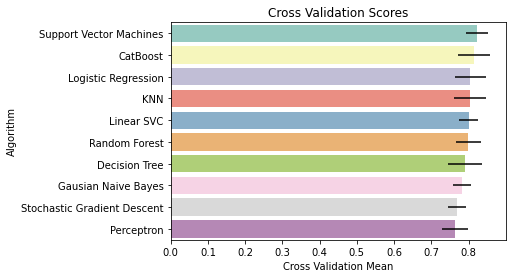

In [148]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [149]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [150]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [151]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [152]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [153]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [154]:
len(Y_pred)

418

In [155]:
ss.head()

,passenger_id,survived
0,295,0
1,1150,0
2,89,0
3,1063,0
4,1020,0


In [156]:
ss.shape

(459, 2)

In [157]:
# Create submission dataframe

submit = pd.DataFrame({'passenger_id': test['passenger_id'], 'survived': Y_pred})
submit.head()

,passenger_id,survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [158]:
submit.shape

(418, 2)

In [159]:
# Create and save csv file 

submit.to_csv("C:/Users/Owner/Documents/ME_projects/submission.csv", index = False)

In [160]:
submit.to_csv("C:/Users/Owner/submission.csv", index = False)